# Problem 4: Fourier transform (3 pts)

### <div align="right"> &copy; Yurii Laba & Rostyslav Hryniv, 2023 </div>

## Completed by:   
*   First team member
*   Second team member

### Description

#### The aim of this task is to implement continuous and discrete Fourier transforms and understand on practical examples some theoretical phenomena we discussed in lectures.

#### For this task of your homework you can get 3 points. Do not forget to save and rename the notebook before making any changes!

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.integrate import simps
%matplotlib inline
import random

random.seed(42)

## Task 1. Continuous signals, pure tones, and Fourier series (1 pt)

An analog audiosignal $\mathbf{x}$ of duration $T$ is a real-valued (usually continuous) function over $[0,T]$, whose value $\mathbf{x}(t)$ at a time moment $t$ represents the amplitude of air pressure variations, i.e., the change in air pressure with respect to some reference value. These pressure variations cause virbations of the ear drums, which are converted into electromagnetic impulses that are then sent to our brain.

Physical laws of gas dynamics imply that each such signal can be represented as a superposition of periodic ***pure tones*** $\sin( \omega t + \phi)$, i.e.,
$$\mathbf{x}(t) = \sum a_k \sin(\omega_k t + \phi_k).$$
Here $a_k$ is the amplitude of the respective pure wave of ***frequency*** $\omega_k/2\pi$ Hz (Hertz, cycles per second) and phase shift of $\phi_k$ radians. Observe that a wave of frequency $\omega_k/2\pi$ Hz has a period of $2\pi/\omega_k$ seconds.

The signal $\mathbf{x}$ can be regarded as periodic of period $T$ and can be represented via the ***Fourier series***
$$
  \mathbf{x}(t) = \frac{a_0}{2} + \sum_k a_k \cos(2\pi k t / T) + \sum_k b_k \sin(2\pi k t/T),
$$
where
$$
 a_k:= \frac{2}{T} \int_0^T f(s)\cos(2\pi ks/T)\,ds,  \qquad b_k:= \frac{2}{T} \int_0^T f(s)\sin(2\pi ks/T)\,ds
$$
are the ***Fourier coefficients***.


---
### Task 1.1.
Consider the signal
$$
  \mathbf{x}(t) = 0.5 \sin(2t) - \sin(3t) + n_t
$$
over the interval $[0,4\pi]$, where $n_t$ is the *white noise*, i.e., a family of independent Gaussian random variables $\mathcal{N}(0, \sigma^2)$ with $\sigma^2 = 0.01$.
- Generate the noiseles signal $\mathbf{x}$ and then add the noise to form $\mathbf{x}_\mathrm{noise}$
- Calculate the Fourier coefficients $a_k$ and $b_k$ of noiseless signal $\mathbf{x}$ for $k = 0,1, \dots, 200$ and plot them. Comment on any special features in the distribution of $a_k$ and $b_k$ you have noticed
- Calculate the Fourier coefficients $a_k$ and $b_k$ of the noisy signal $\mathbf{x}_\mathrm{noise}$ for $k = 0,1, \dots, 200$ and plot them. Comment on any special features in the distribution of $a_k$ and $b_k$ you have noticed
- Determine several (4-6) most important Fourier coefficients $a_k$ and $b_k$. What $k$ do they correspond to? What are the corresponding frequencies?
  
Use the grid of $200$ points $t_j$ for plotting and calculation of the Fourier coefficients (i.e., for numerical integration)

---

In [4]:
def signal(s):
  # ========= YOUR CODE STARTS HERE ========= #
  return 0.5*np.sin(2*s) - np.sin(3*s)
  # ========== YOUR CODE ENDS HERE ========== #
N = 200

t = np.linspace(0, 4*np.pi, N+1)[:-1]
x = signal(t)

# ========= YOUR CODE STARTS HERE ========= #
x_noise = x + np.random.normal(0, 0.1, len(x))
# ========== YOUR CODE ENDS HERE ========== #

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
/var/folders/5x/4v4zxsd90w7gp7g92k0ftrn00000gn/T/ipykernel_24333/3278230964.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Original signal $\mathbf{x}$ and $\mathbf{x}_\mathrm{noise}$')


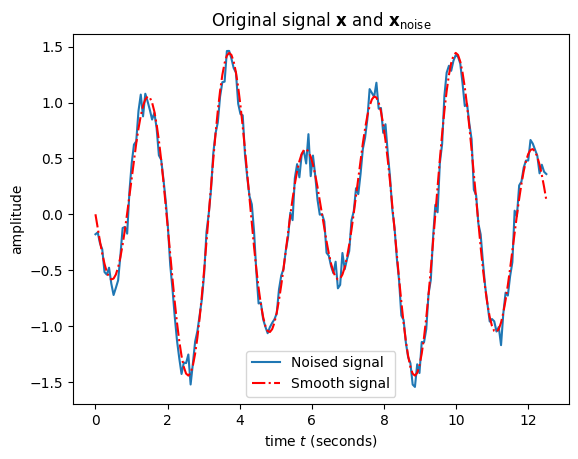

In [5]:
plt.plot(t, x_noise, label = "Noised signal")
plt.plot(t, x, "r-.", label = "Smooth signal")
plt.title('Original signal $\mathbf{x}$ and $\mathbf{x}_\mathrm{noise}$')
plt.xlabel("time $t$ (seconds)")
plt.ylabel("amplitude")
plt.legend()
plt.show()

In [28]:
########################################
#     Trigonometric Fourier coefficients
########################################

rng = np.arange(N).reshape(1, -1)

nt = rng*t

# cos_samples and sin_samples are N x N matrices with sampled cosines/sines written in rows

# ========= YOUR CODE STARTS HERE ========= #
cos_samples = np.cos(nt)
sin_samples = np.sin(nt)
# ========== YOUR CODE ENDS HERE ========== #


In [71]:
# (x * cos_samples)[1, :] == x * cos_samples[1, :]

<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
/var/folders/5x/4v4zxsd90w7gp7g92k0ftrn00000gn/T/ipykernel_24333/1854816538.py:26: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Trigonometric Fourier coefficients $a_k$ and $b_k$ for $\mathbf{x}$')


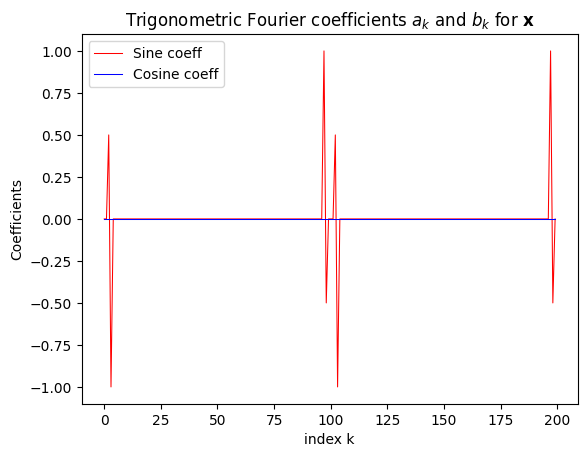

In [73]:
########################################
#  noiseless case
########################################

# ========= YOUR CODE STARTS HERE ========= #

a = np.apply_along_axis(sum, 1, (x * cos_samples))  
b = np.apply_along_axis(sum, 1, (x * sin_samples))

# a = simps(x * cos_samples)   #  the sequence of N cosine coefficients of signal x
# b = simps(x * sin_samples)   #  the sequence of N sine coefficients of signal x


a[0] = a[0] / N
a[1:] = a[1:] * 2 / N

b[0] = b[0] / N
b[1:] = b[1:] * 2 / N

# ========== YOUR CODE ENDS HERE ========== #

plt.plot(range(N), b.T, "r", lw = 0.75, label = "Sine coeff")
plt.plot(range(N), a.T, "b", lw = 0.75, label = "Cosine coeff")
plt.xlabel("index k")
plt.ylabel("Coefficients")
plt.title('Trigonometric Fourier coefficients $a_k$ and $b_k$ for $\mathbf{x}$')
plt.legend()
plt.show()


/var/folders/5x/4v4zxsd90w7gp7g92k0ftrn00000gn/T/ipykernel_24333/2345055559.py:10: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  a_noise =  simps(x_noise * cos_samples)   #  the sequence of N cosine coefficients of noisy signal x_noise
/var/folders/5x/4v4zxsd90w7gp7g92k0ftrn00000gn/T/ipykernel_24333/2345055559.py:11: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  b_noise =  simps(x_noise * sin_samples)   #  the sequence of N  sine  coefficients of noisy signal x_noise


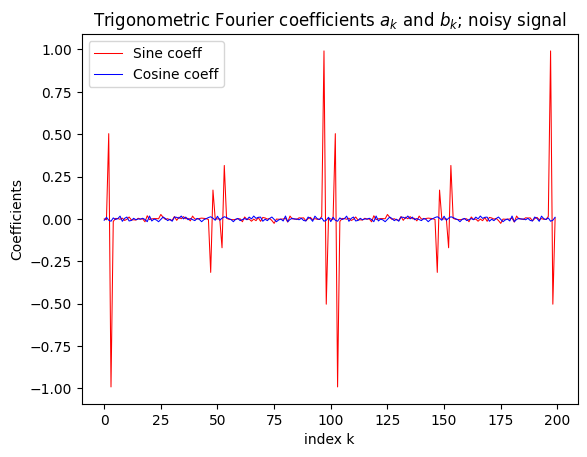

In [130]:
########################################
#  noisy signal
########################################

# ========= YOUR CODE STARTS HERE ========= #

# a_noise = np.apply_along_axis(sum, 1, (x_noise * cos_samples))  
# b_noise = np.apply_along_axis(sum, 1, (x_noise * sin_samples))

a_noise =  simps(x_noise * cos_samples)   #  the sequence of N cosine coefficients of noisy signal x_noise
b_noise =  simps(x_noise * sin_samples)   #  the sequence of N  sine  coefficients of noisy signal x_noise

a_noise[0] = a_noise[0] / N
a_noise[1:] = a_noise[1:] * 2 / N

b_noise[0] = b_noise[0] / N
b_noise[1:] = b_noise[1:] * 2 / N

# ========== YOUR CODE ENDS HERE ========== #

plt.plot(range(N), b_noise.T, "r", lw = 0.75, label = "Sine coeff")
plt.plot(range(N), a_noise.T, "b", lw = 0.75, label = "Cosine coeff")
plt.xlabel("index k")
plt.ylabel("Coefficients")
plt.title('Trigonometric Fourier coefficients $a_k$ and $b_k$; noisy signal')
plt.legend()
plt.show()


---

#### **Your explanations for Task 1.1 come here**

---

---
### Task 1.2

- Construct approximations $\hat{\mathbf{x}}_n$ of $\mathbf{x}_{\mathrm{noise}}$ using $a_k$ and $b_k$ for $k = 0,1, \dots, n$, with $n=5, 10, 100, 200$
- Plot the original and reconstructed signals for $n = 5, 10, 100$, and $200$ and discuss the effect
- Calculate the accuracy of approximation based on the maximal value of $|\mathbf{x}_{\mathrm{noise}}(t_j) - \hat{\mathbf{x}}_n(t_j)|$  
- What goes wrong for $n=5$ and $n=200$? Can you explain strong change from $n=6$ to $n=7$? Also, increasing $n$ should improve proximity of $\hat{\mathbf{x}}_n$ and the original signal $\mathbf{x}_{\mathrm{noise}}$; however, $n=200$ gives very poor approximation.

Use the grid of $200$ points $t_j$ for plotting and calculation of the Fourier coefficients (i.e., numerical integration)

---

In [131]:
# Reconstruction of the signal using n sine and cosine Fourier coefficients
# Pay special attention to a_0!
def x_rec(n, a, b):
  # n is the number of coefficients a_k and b_k to be included
  # a is the 1d array of cosine coefficients
  # b is the 1d array of  sine  coefficients

  # ========= YOUR CODE STARTS HERE ========= #

  a[n:] = 0
  b[n:] = 0

  x = (a.T @ cos_samples + b.T @ sin_samples).flatten()

  return x
  # ========== YOUR CODE ENDS HERE ========== #

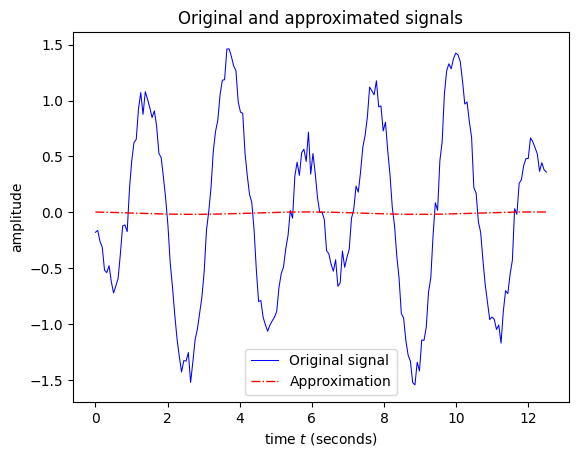

In [138]:
plt.plot(t, x_noise, 'b', lw= 0.75, label = "Original signal")
plt.plot(t, x_rec(100, a_noise, b_noise).T, 'r-.', lw = 1, label = "Approximation")
plt.title('Original and approximated signals')
plt.xlabel("time $t$ (seconds)")
plt.ylabel("amplitude")
plt.legend()
plt.show()

In [102]:
np.allclose(x_noise, x_rec(100, a_noise, b_noise), rtol=0.01)

False

In [103]:
np.max(np.abs(x_noise - x_rec(100, a_noise, b_noise)))

1.539770145335954

---

#### **Your explanations for Task 1.2 come here**

---

## Task 2. Sampling and aliasing (0.7 pts)

There are several reasons for appearance of the spurious frequencies in the above example, the main one being related to ***aliasing***.

Assume we measure an analogue signal $\mathbf{x}$ of duration $T$ on the time lattice $t_j = \Delta t \cdot j$, $j=0,1, \dots, N-1$. The time step $\Delta t = T/N$ is called the ***sample period***, and the number of samples per 1 second, $f_s = 1/\Delta t = N/T$, is the ***sampling rate***. The process of measuring the input analog signal at the points $t_j$ is called ***sampling***; we then discretize the obtained values $\mathbf{x}(t_j)$ to form a ***digital signal*** $\mathbf{x} = \bigl(x(0), x(t_1),\dots, x(t_{N-1})\bigr)$ of length $N$.

The point is, some pure tones (harmonics) $\sin(\omega t)$ or $\cos(\omega t)$ have identical samples. Indeed, to have
$$
  \cos(\omega_1 t_j) = \cos(\omega_2 t_j), \qquad j = 0,1, \dots, N-1,
$$
it is necessary and sufficient that
$$
  \sin\Bigl(\frac{\omega_1 - \omega_2}{2}t_j\Bigr) \sin\Bigl(\frac{\omega_1 + \omega_2}{2}t_j\Bigr) = 0
$$
i.e.,
$$
  (\omega_1 + \omega_2) \Delta t = 2\pi k \quad\text{or}\quad
  (\omega_1 - \omega_2) \Delta t = 2\pi k
$$
A similar condition can be written for two sinusoids $\sin(\omega_1 t)$ and $\sin(\omega_2 t)$ to have identical samples.



---
### Task 2.1

- Assume that we take $20$ samples of the signal of duration $4\pi$. What is the sampling rate of the resulting signal?
- Given the signal $\sin(2t)$, find $k$ such that  $-\sin(kt)$ coincides with it at the $20$ sample points. Explain your choice and plot the graphs to demonstrate the effect
- Take the signal $\mathbf{x}$ without white noise and suggest a linear combination of two other sinusoids that coincides with $\mathbf{x}$ at the $20$ sampled points. Explain your choice and plot the graphs to demonstrate the effect.
---


In [ ]:
y = np.linspace(0,4*np.pi, 21)[:-1]

plt.plot(t, np.sin(2*t), lw = 0.75, label = "Sampled signal sin(2t)")

# ========= YOUR CODE STARTS HERE ========= #

# plug in proper k below
k = ...
# ========== YOUR CODE ENDS HERE ========== #

plt.plot(t, -np.sin(k*t), "r-.", label = "Sampled signal -sin(kt)")
plt.plot(y, np.sin(2*y), "bo", markersize = 4)
plt.title('Aliasing')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

print(np.isclose(np.sin(2*y), -np.sin(8*y)))

Now find aliasing to the initial signal; it should be a linear combination of two sine signals $\sin(\omega t)$ with $\omega$ different from $2$ and $3$

In [ ]:
plt.plot(t, x, lw = 0.75, label = "Original signal x(t)")

# ========= YOUR CODE STARTS HERE ========= #
plt.plot(t, ...  , "r-.", label = "Aliased signal")
plt.plot(y, ...  , "bo", markersize = 4, label = "Sampled signals")
# ========== YOUR CODE ENDS HERE ========== #

plt.title('Aliasing')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [ ]:
# ========= YOUR CODE STARTS HERE ========= #
np.isclose(signal(y), ... )
# ========== YOUR CODE ENDS HERE ========== #

---

#### **Your explanations for Task 2.1 come here**

---

## Task 3. Fourier transform and FFT (1 pt)

Another reason why spurious frequencies appeared in ***Task 1.2*** is due to integration error. When we replaced the integrals for calculating the Fourier coefficinets $a_k$ and $b_k$ by the Riemann integral sums, aliasing for sinusoids with high frequencies led to results identical with those for smaller frequencies, although the actual $a_k$ and $b_k$ are equal to zero for smooth signal and are very small for noisy signal.

In other words, when replacing integrals with sums, we actually moved the object of study from the analog signals in $L_2[0,4\pi]$ to digital signals in $\mathbb{R}^N$. Certainly, $N$ sampled cosines and $N$ sampled sines formed linearly dependent vectors in $\mathbb{R}^N$, and that is why using all of them to reconstruct the original signal $\mathbf{x}_\mathrm{noise}$ failed.

When working with digital signals in $\mathbb{R}^N$, we only need $N$ basis vectors. Observe that sampled cosines are <font color="red">*even*</font> functions with respect to mid-point, i.e., $\cos(t_j) = \cos(t_{N-j})$; likewise, sines are <em><font color="red">odd</font></em> with respect to the mid-point. Another observation is that neither sampled cosines nor sampled sines form orthogonal sets. For that reason, a more convenient orthogonal basis in $\mathbb{C}^N$ is given by the sampled exponentials $\mathrm{e}^{2\pi \mathrm{i} k t/T}$, $k=0,1,\dots,N-1$: $$\mathbf{e}_k:=\bigl(1, \mathrm{e}^{2\pi \mathrm{i}k t_1/T}, \dots, \mathrm{e}^{2\pi \mathrm{i}t_{N-1}/T}\bigr)$$
Observe that the exponential function $\mathrm{e}^{2\pi \mathrm{i} k t/T}$ is a pure complex harmonics of frequency $k/T$ Hz.

Every vector $\mathbf{x} \in \mathbb{C}^N$ can be represented in this basis in the standard way: $$\mathbf{x} = \sum_k c_k \mathbf{e}_k, \qquad c_k = \frac{\langle \mathbf{x}, \mathbf{e}_k\rangle}{\langle \mathbf{e}_k, \mathbf{e}_k\rangle} = \frac1N\sum_j x_j \mathrm{e}^{- 2\pi \mathrm{i}t_{j}/T} \tag{4}$$
The $c_k$ are <font color = "red">complex Fourier coefficients</font> of $\mathbf{x}$, and the mapping
$$
   \mathbf{x} \mapsto (c_k)_{k=0}^{N-1}
$$
is the <font color = "red">Fourier transform</font>. While the direct approach of calculating $c_k$ requires $O(N^2)$ flops, the ***Fast Fourier transform (FFT)*** performs this in $O(N\log N)$ flops. Given that a standard audio signal of duration 1 second is sampled $N = 44\,100$ times, FFT gives a significant gain in time efficiency.

---
### Task 3.1

- Calculate the Fourier coefficients $c_k$ of the noisy signal $\mathbf{x}_{\mathrm{noise}}$ via (4) and plot their real and imaginary parts. Do you see any pattern? Both real and imaginary parts have mid-point symmetry. Explain which are even with respect to the midpoint, and which are odd
- Calculate $c_k$ using the $\texttt{fft}$ function and plot their real and imaginary parts. Explain why the real parts are quite small but the imaginary ones have spikes (for what $k$)?
- Compare the results; take into account that the $\texttt{fft}$ function does not divide the coefficients by $N$; instead, the scaling is applied to the reconstructed image during the inverse FFT step $\texttt{ifft}$
- Detect the indices $k$ for which $|c_k|$ are large and explain the finding
---

In [ ]:
# Complex Fourier coefficients calculated directly

# ========= YOUR CODE STARTS HERE ========= #
compl_exp = np.exp( ... )  #  N x N matrix of exponents
c = ...                    #  complex Fourier coefficients on the noisy signal
# ========== YOUR CODE ENDS HERE ========== #

plt.plot(c.real.T, 'r', lw = 0.75, label = "Real parts of $c_k$")
plt.plot(c.imag.T, 'b', lw = 0.75, label = "Imaginary parts of $c_k$")
plt.title('Fourier coefficients of the noisy signal $\mathbf{x}_{\mathrm{noise}}$')
plt.legend()
plt.show()

In [ ]:
# Complex Fourier coefficients via FFT
freq = fft(x_noise)

plt.plot(freq.real, 'r', lw = 0.75, label = "Real parts of $c_k$")
plt.plot(freq.imag, 'b', lw = 0.75, label = "Imaginary parts of $c_k$")
plt.title('Fourier coefficients of the noisy signal $\mathbf{x}_{\mathrm{noise}}$ via FFT')
plt.legend()
plt.show()

In [ ]:
np.allclose(c, freq/200)

---    
#### **Remark**
Recall the Euler formula
$$ \sin(\alpha x) =  \frac{\mathrm{e}^{\mathrm{i}\alpha x} - \mathrm{e}^{-\mathrm{i}\alpha x}}{2\mathrm{i}};$$
this gives the Fourier coefficients of $\sin(\alpha x)$. Noting that $c_{-k}$ can identified with $c_{N-k}$, this sheds light on the distribution of the Fourier coefficients for the signal $\mathbf{x}$    


---

#### **Your explanations for task 3.1 come here**


---





---
### Task 3.2

- Make sure that the noisy signal $\mathbf{x}_\mathrm{noise}$ is perfectly reconstructed via $\mathtt{ifft}$
- Reconstruct the noisy signal $\mathbf{x}_\mathrm{noise}$ directly and compare with the original
- Set the coefficients nos. 11 to 189 to zero and reconstruct the signal. Comment on the observed effect
- Take the smooth signal $\mathbf{x}$ and construct the Fourier coefficients using $\texttt{fft}$. Plot the real and imaginary parts and comment on the difference with the noiseless case
---

In [ ]:
np.allclose(x_noise, ifft(freq))

In [ ]:
# ========= YOUR CODE STARTS HERE ========= #
#  Now reconstruct x_noise directly (without IFFT)
x_rec_F = np.matmul(c, ... )   #  direct reconstruction of the signal
# ========= YOUR CODE ENDS HERE ========= #


plt.plot(t, x_noise, lw = 0.75, label = "Original signal")
plt.plot(t, x_rec_F.T, "r-.", label = "Reconstructed signal")
plt.title('Signal $\mathbf{x}_{\mathrm{noise}}$ and its direct reconstruction')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

Make sure the reconstructions (via FFT and direct) return original signal:


In [ ]:
x_rec_FFT = ifft(freq)
np.allclose(x_noise, x_rec_FFT)

In [ ]:
np.allclose(x_noise, x_rec_F)

Set all frequencies but for the first and the last $n$ (with say $n=10$ to zero and observe the result

In [ ]:
freq_smoothed = freq.copy()
# ========= YOUR CODE STARTS HERE ========= #
freq_smoothed[ ... ] = 0
# ========= YOUR CODE ENDS HERE ========= #

In [ ]:
np.sum(np.isclose(x_noise, ifft(freq_smoothed), rtol = 0.05))

In [ ]:
#  Plot the original noisy and smoothed signals

plt.plot(t, x_noise, lw = 0.75, label = "Original signal")
plt.plot(t, ifft(freq), 'r-.', label = "Reconstructed signal")
plt.plot(t, ifft(freq_smoothed), 'g-.', label = "Smoothed signal")
plt.title('Signal $\mathbf{x}_{\mathrm{noise}}$ and its reconstruction')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

Plot the Fourier coefficients (real and imaginary parts) of the initial smooth signal and compare to those in $\mathtt{freq\_smoothed}$


In [ ]:
# ========= YOUR CODE STARTS HERE ========= #
...
# ========= YOUR CODE ENDS HERE ========= #

---

#### **Your explanations for Task 3.2 come here**

---

## 4. Conclusions (0.3 pts)

Summarize in a few sentences what you have learned and achieved by completing the tasks of this assignment

---

\### **YOUR ANSWER HERE** \###

---